In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from scipy.signal import chirp
import scipy.signal as signal
%matplotlib widget

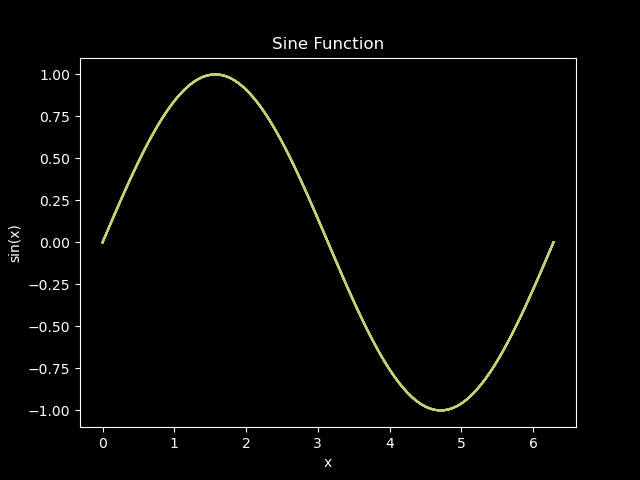

In [8]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# 创建图形并绘制曲线
plt.plot(x, y)

# 添加标题和轴标签
plt.title('Sine Function')
plt.xlabel('x')
plt.ylabel('sin(x)')

# 显示图形
plt.show()

### 1. Signal & Frequency Example

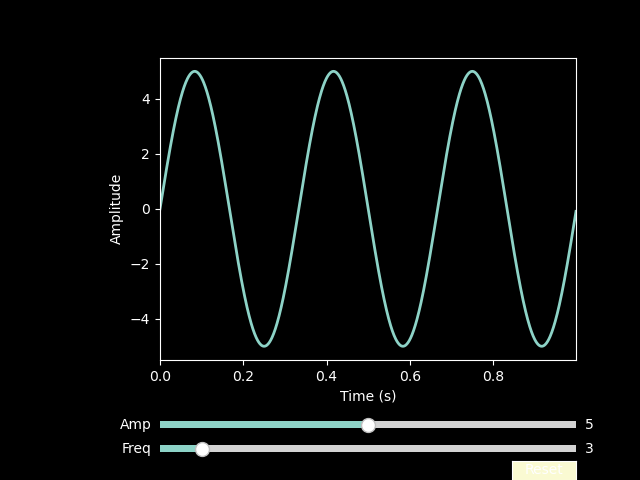

In [9]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 1.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

max_amp = 11

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.10, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.0, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.0, 10.0, valinit=a0)

def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
    # auto-adjust y-axis limits
    ax.set_ylim(-max_amp, max_amp)

sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.0, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

# Add x and y labels, and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()

plt.show()

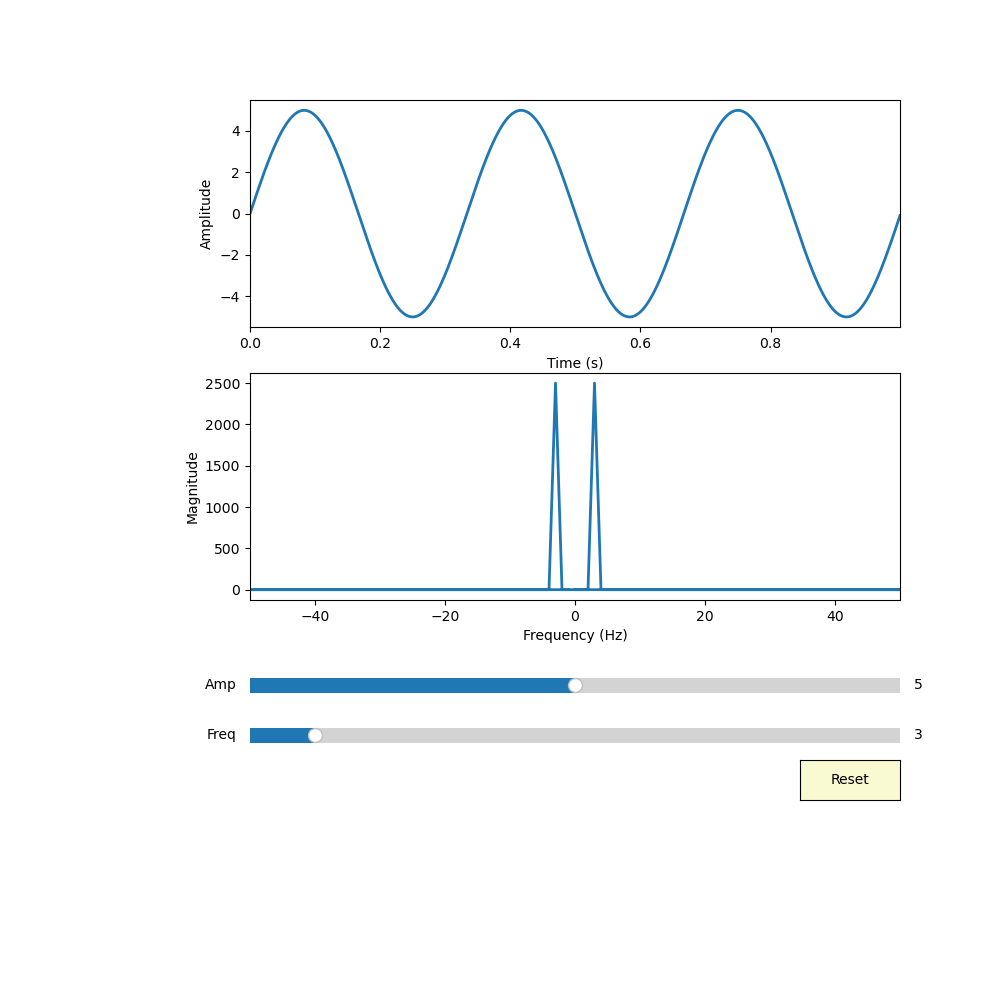

In [7]:
# set fig size
plt.rcParams['figure.figsize'] = [10, 10]
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.25, bottom=0.4, top=0.9)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 1.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l1, = ax1.plot(t, s, lw=2)
ax1.margins(x=0)

max_amp = 11

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.30, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.0, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.0, 10.0, valinit=a0)

def update(val):
    amp = samp.val
    freq = sfreq.val
    s = amp*np.sin(2*np.pi*freq*t)
    l1.set_ydata(s)
    ax1.set_ylim(-max_amp, max_amp)
    l2.set_ydata(np.abs(np.fft.fft(s)))
    ax2.set_ylim(0, 7000)
    fig.canvas.draw_idle()

sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.2, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

# Add x and y labels, and title
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')

def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

# Plot the frequency spectrum
spectrum = np.abs(np.fft.fft(s))
freqs = np.fft.fftfreq(len(s), t[1]-t[0])
l2, = ax2.plot(freqs, spectrum, lw=2)
ax2.set_xlim(-50, 50)

plt.show()

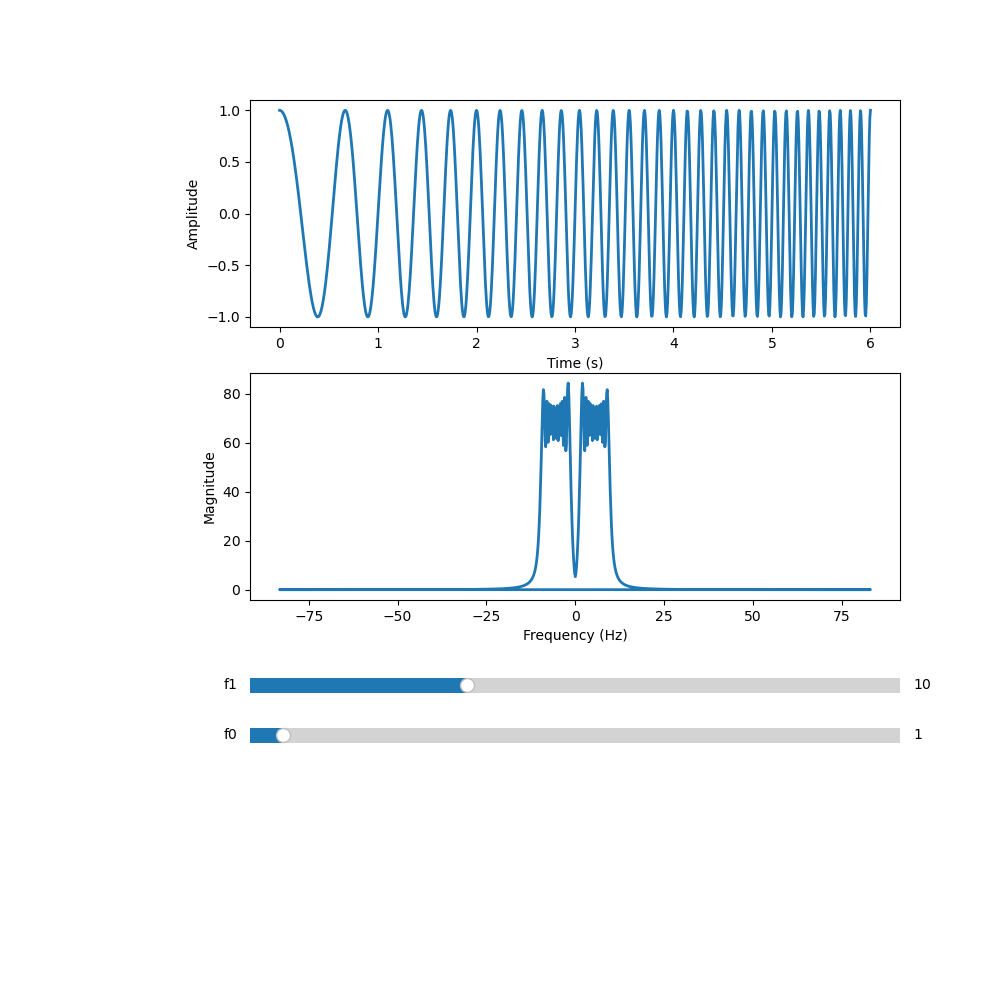

In [8]:
# Generate some sample data
t = np.linspace(0, 6, 1000)
f0 = 1
f1 = 10
s = chirp(t, f0=f0, f1=f1, t1=6, method='linear')

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.25, bottom=0.4, top=0.9)

# Plot the time-domain signal
line1, = ax1.plot(t, s, lw=2)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

# Plot the frequency spectrum
spectrum = np.abs(np.fft.fft(s))
freqs = np.fft.fftfreq(len(s), t[1]-t[0])
line2, = ax2.plot(freqs, spectrum, lw=2)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')

# Add sliders for frequency and time
axcolor = 'lightgoldenrodyellow'
axf0 = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
axf1 = plt.axes([0.25, 0.3, 0.65, 0.03], facecolor=axcolor)

f0_slider = Slider(axf0, 'f0', 0, 20, valinit=f0)
f1_slider = Slider(axf1, 'f1', 0, 30, valinit=f1)

# Define the update function for the sliders
def update(val):
    # Get the current slider values
    f0 = f0_slider.val
    f1 = f1_slider.val

    # Generate the chirp signal with the current frequency range
    s = chirp(t, f0=f0, f1=f1, t1=6, method='linear')

    # Update the time-domain plot
    line1.set_ydata(s)
    ax1.relim()
    ax1.autoscale_view()

    # Update the frequency spectrum plot
    spectrum = np.abs(np.fft.fft(s))
    freqs = np.fft.fftfreq(len(s), t[1]-t[0])
    line2.set_xdata(freqs)
    line2.set_ydata(spectrum)
    ax2.relim()
    ax2.autoscale_view()
    # set ax2 x-axis range from -50 - 50 Hz
    ax2.set_xlim(-50, 50)

    # Redraw the figure
    fig.canvas.draw_idle()

# Connect the sliders to the update function
f0_slider.on_changed(update)
f1_slider.on_changed(update)

# Show the plot
plt.show()

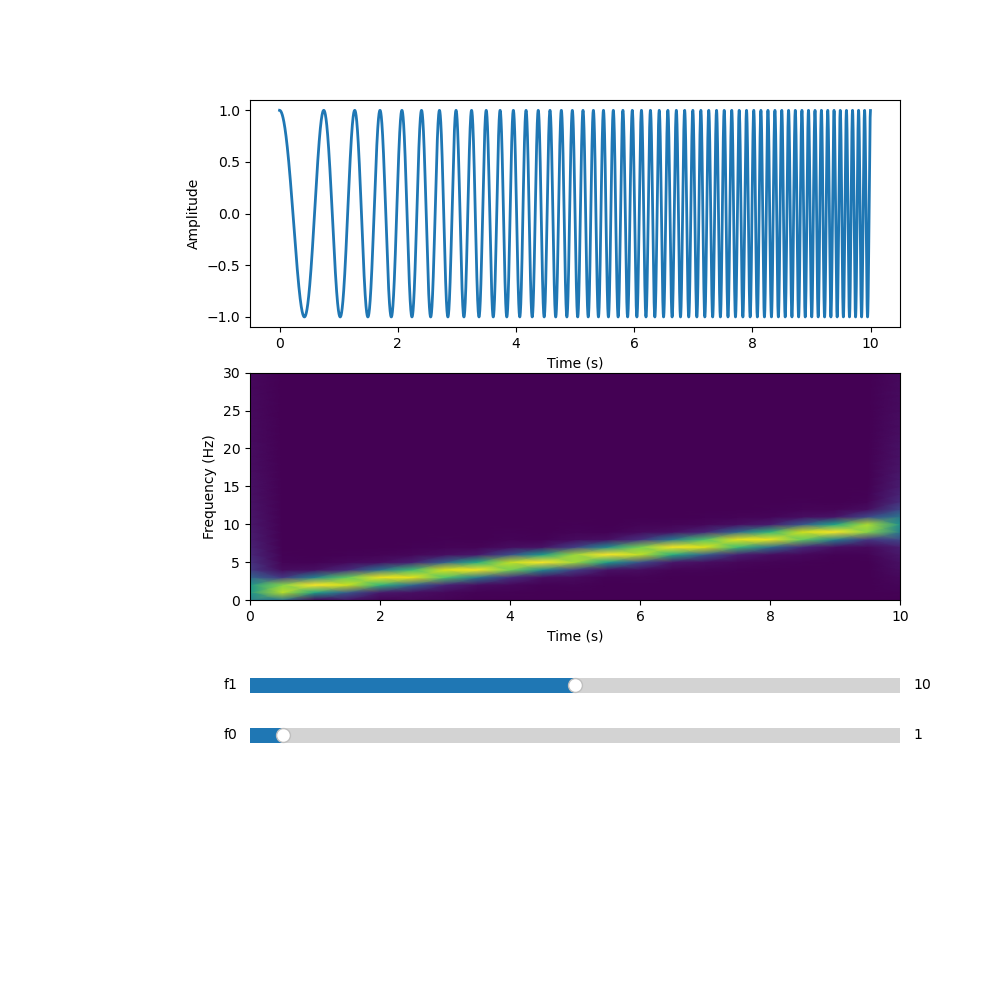

In [9]:
# generate chirp signal
def chirp_signal(f_start, f_end, T, fs):
	t = np.arange(0, T, 1/fs)
	signal_ = signal.chirp(t, f_start, T, f_end, method='linear')
	return signal_

# Generate some sample data
fs = 1000
t = np.arange(0, 10, 1/fs)
f0 = 1
f1 = 10
s = chirp_signal(f0, f1, 10, fs)

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.25, bottom=0.4, top=0.9)

# Plot the time-domain signal
line1, = ax1.plot(t, s, lw=2)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

# Plot the STFT (using signal.stft)
stft_f, stft_t, Zxx = signal.stft(s, fs=fs, nperseg=1000)
# plot the magnitude of the STFT
line2 = ax2.pcolormesh(stft_t, stft_f, np.abs(Zxx), shading='gouraud')
ax2.set_ylim(0, 30)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')

# Add sliders for frequency and time
axcolor = 'lightgoldenrodyellow'
axf0 = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
axf1 = plt.axes([0.25, 0.3, 0.65, 0.03], facecolor=axcolor)

f0_slider = Slider(axf0, 'f0', 0, 20, valinit=f0)
f1_slider = Slider(axf1, 'f1', 0, 20, valinit=f1)

# Define the update function for the sliders
def update(val):
    # Get the current slider values
    f0 = f0_slider.val
    f1 = f1_slider.val

    # Generate the chirp signal with the current frequency range
    s = chirp_signal(f0, f1, 10, fs)

    # Update the time-domain plot
    line1.set_ydata(s)
    ax1.relim()
    ax1.autoscale_view()

    # Clear the STFT plot
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Frequency (Hz)')
    # Update the STFT plot
    stft_f, stft_t, Zxx = signal.stft(s, fs=fs, nperseg=1000)
    line2 = ax2.pcolormesh(stft_t, stft_f, np.abs(Zxx), shading='gouraud')
    # set ax2 y-axis range from 0 - 50 Hz
    ax2.set_ylim(0, 30)
    ax2.relim()
    ax2.autoscale_view()

    # Redraw the figure
    fig.canvas.draw_idle()

# Connect the sliders to the update function
f0_slider.on_changed(update)
f1_slider.on_changed(update)

# Show the plot
plt.show()